# 🎮 Reinforcement Learning – Final Project  

## 👨‍🏫  Master 2 Reinforcement Learning Course  (Pr. Erwan Lepennec)
####  **Amine Razig - Abdelilah Younsi - Yassine Oj**  

### 📝 Presentation of the RAINBOW Algorithm  

---

## 🎯 **Objectives of the Experiments**  
The goal of this project is to analyze the performance of the **RAINBOW** algorithm across different games and to study how its various components influence its efficiency.  

This work is carried out as part of the **final project** for the **Reinforcement Learning** course. The project is based on the paper:  
📄 *"Rainbow: Combining Improvements in Deep Reinforcement Learning"*.  

---

## 📚 **References**  
- 📖 Course materials  
- 📄 Research papers  
- 💻 GitHub repository: **Tienshou - Rainbow is all you need - Rainbow**  

---


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

from rainbow import *
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from gymnasium import logger as gymlogger
gymlogger.set_level(40)
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import cv2


def wrap_env(env):
  env = RecordVideo(env, './video')
  return env


def save_animation(frames, path, fs=30):
    print(frames)
    size = frames[0].shape[1], frames[0].shape[0]
    out = cv2.VideoWriter(path, cv2.VideoWriter_fourcc(*'MP4V'), fs, size)
    for i in range(len(frames)):
        out.write(frames[i])
    out.release()

/users/eleves-a/2024/amine.razig/Rainbow/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Initialization of parameters and agent:**

In [17]:
# Select an environment
env_name = ["Acrobot-v1"]#, "MsPacman-v0"]

# PARAMETERS----------------------------------------------------
env_idx = 0  # environment id
num_frames = 100000  # number of training frames
memory_size = 2000  # replay memory size
batch_size = 32  # batch size
target_update = 1000  # update target network frequency
frame_interval = 1000  # refresh plot frequency
plot = True  # plot score and loss during training
model_name = env_name[env_idx] + "_" + str(num_frames)  # model name, don't need to change it
training_delay = num_frames // 50  # number of frames before start training
trials = 10  # number of evaluation episodes
frames_stack = 1  # number of consecutive frames to take as input
train = True  # train a new model
test = True  # evaluate the new model if train==True,
             # otherwise try to load an old model that has been trained for num_frames frames
             # and if present use it to perform evaluation
# ---------------------------------------------------------------

preprocess_function = None 
if env_idx == 1:  # MsPacman: convert to greyscale, resize, crop and normalize each frame
    preprocess_function = preprocess_obs_pacman

env = wrap_env(gym.make(env_name[env_idx], render_mode='rgb_array'))

agent = DQNAgent(env, memory_size, batch_size, target_update,
                 plot=plot,
                 frame_interval=frame_interval,
                 frame_preprocess=preprocess_function,
                 n_frames_stack=frames_stack,
                 model_name=model_name,
                 training_delay=training_delay
                 )

Using DenseNet
Device cuda


## high number of frames training full *RAINBOW* : 
### Game : **Acrobot**

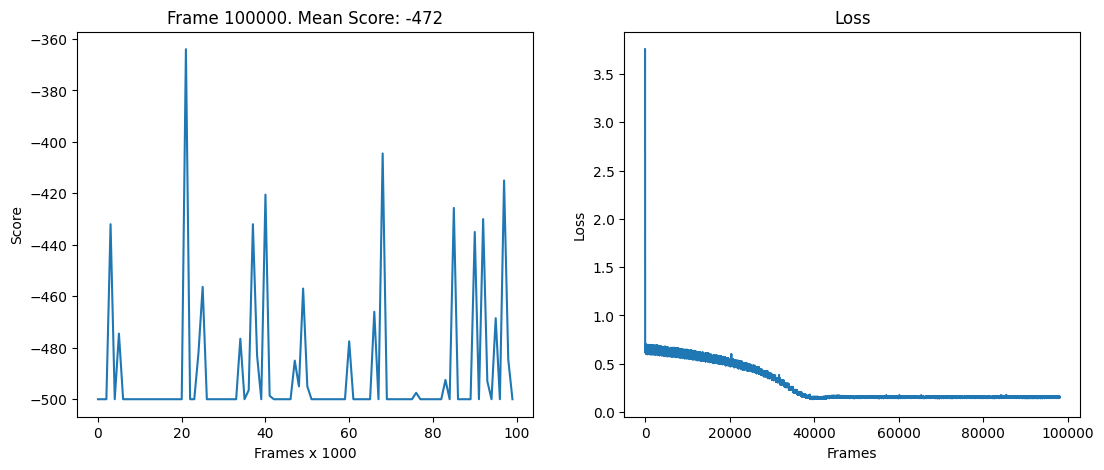

Saving model...
Model saved in: models/Acrobot-v1_100000.tar
Saving model...
Model saved in: models/Acrobot-v1_100000.tar
Restoring saved model...
Model restored from: models/Acrobot-v1_100000.tar
Captured frame 1
Captured frame 2
Captured frame 3
Captured frame 4
Captured frame 5
Captured frame 6
Captured frame 7
Captured frame 8
Captured frame 9
Captured frame 10
Captured frame 11
Captured frame 12
Captured frame 13
Captured frame 14
Captured frame 15
Captured frame 16
Captured frame 17
Captured frame 18
Captured frame 19
Captured frame 20
Captured frame 21
Captured frame 22
Captured frame 23
Captured frame 24
Captured frame 25
Captured frame 26
Captured frame 27
Captured frame 28
Captured frame 29
Captured frame 30
Captured frame 31
Captured frame 32
Captured frame 33
Captured frame 34
Captured frame 35
Captured frame 36
Captured frame 37
Captured frame 38
Captured frame 39
Captured frame 40
Captured frame 41
Captured frame 42
Captured frame 43
Captured frame 44
Captured frame 45
Ca

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video saved at videos/Acrobot-v1_100000.mp4


In [18]:
if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)

    env.close()

    if not os.path.exists("videos"):
        os.makedirs("videos")
    save_path = os.path.join("videos", model_name + ".mp4")
    save_animation(best_frames, save_path, 20)
    print("Video saved at", save_path)

## Test of combinations of Rainbow method components : **ablation effect studies**
#### game : **CartPole**

In [38]:
combinations = [
    {"no_double": False, "no_dueling": False, "no_priority": False, "no_n_step": False, "no_categorical": False, "no_noise": False},  # All components on
    {"no_double": True, "no_dueling": False, "no_priority": False, "no_n_step": False, "no_categorical": False, "no_noise": False},   # Double Q-learning off
    {"no_double": False, "no_dueling": True, "no_priority": False, "no_n_step": False, "no_categorical": False, "no_noise": False},   # Dueling Network off
    {"no_double": False, "no_dueling": False, "no_priority": True, "no_n_step": False, "no_categorical": False, "no_noise": False},   # Prioritized Experience Replay off
    {"no_double": False, "no_dueling": False, "no_priority": False, "no_n_step": True, "no_categorical": False, "no_noise": False},   # Multi-step Learning off
    {"no_double": False, "no_dueling": False, "no_priority": False, "no_n_step": False, "no_categorical": True, "no_noise": False},   # Distributional RL off
    {"no_double": False, "no_dueling": False, "no_priority": False, "no_n_step": False, "no_categorical": False, "no_noise": True}, # Noisy Nets off
    {"no_double": True, "no_dueling": True, "no_priority": True, "no_n_step": True, "no_categorical": True, "no_noise": True}] # all off



# Select an environment
env_name = ["CartPole-v0"]#, "MsPacman-v0"]

# PARAMETERS----------------------------------------------------
env_idx = 0  # environment id
num_frames = 20000  # number of training frames
memory_size = 2000  # replay memory size
batch_size = 32  # batch size
target_update = 1000  # update target network frequency
frame_interval = 1000  # refresh plot frequency
plot = True  # plot score and loss during training
model_name = env_name[env_idx] + "_" + str(num_frames)  # model name, don't need to change it
training_delay = num_frames // 50  # number of frames before start training
trials = 10  # number of evaluation episodes
frames_stack = 1  # number of consecutive frames to take as input
train = True  # train a new model
test = True  # evaluate the new model if train==True,
             # otherwise try to load an old model that has been trained for num_frames frames
             # and if present use it to perform evaluation
# ---------------------------------------------------------------

preprocess_function = None 
if env_idx == 1:  # MsPacman: convert to greyscale, resize, crop and normalize each frame
    preprocess_function = preprocess_obs_pacman

env = wrap_env(gym.make(env_name[env_idx]))#, render_mode='rgb_array'))


In [39]:
combo =combinations[0]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': False, 'no_priority': False, 'no_n_step': False, 'no_categorical': False, 'no_noise': False}


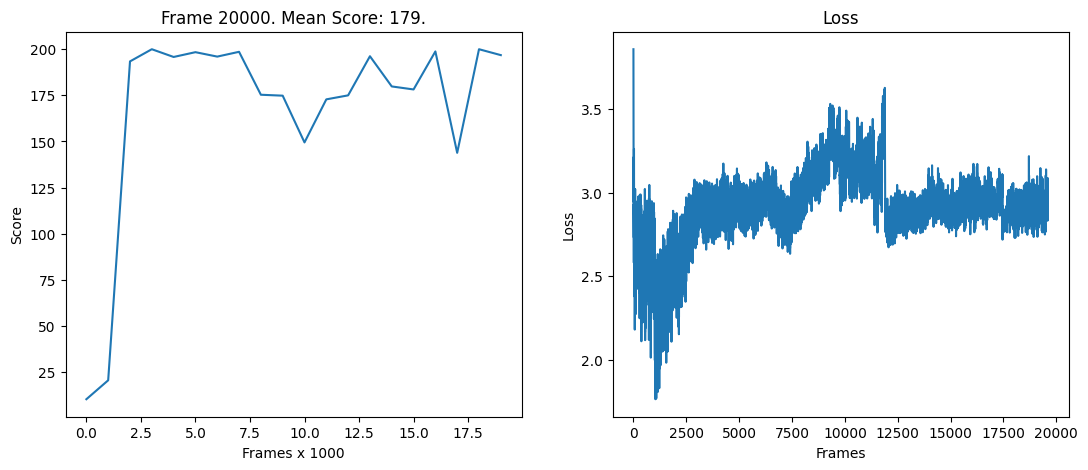

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  191.0
Score:  191.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 199.1
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [40]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [41]:
combo =combinations[1]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': True, 'no_dueling': False, 'no_priority': False, 'no_n_step': False, 'no_categorical': False, 'no_noise': False}


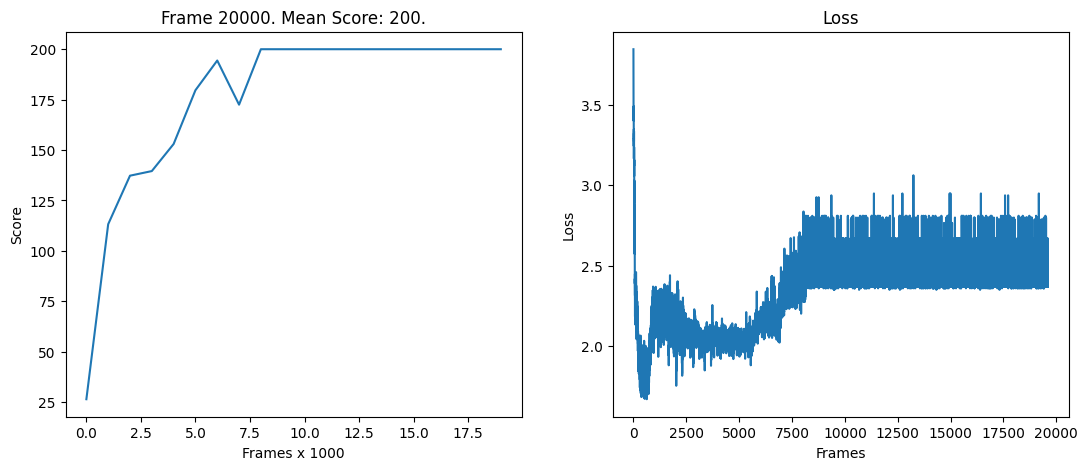

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 200.0
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [42]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [43]:
combo =combinations[2]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': True, 'no_priority': False, 'no_n_step': False, 'no_categorical': False, 'no_noise': False}


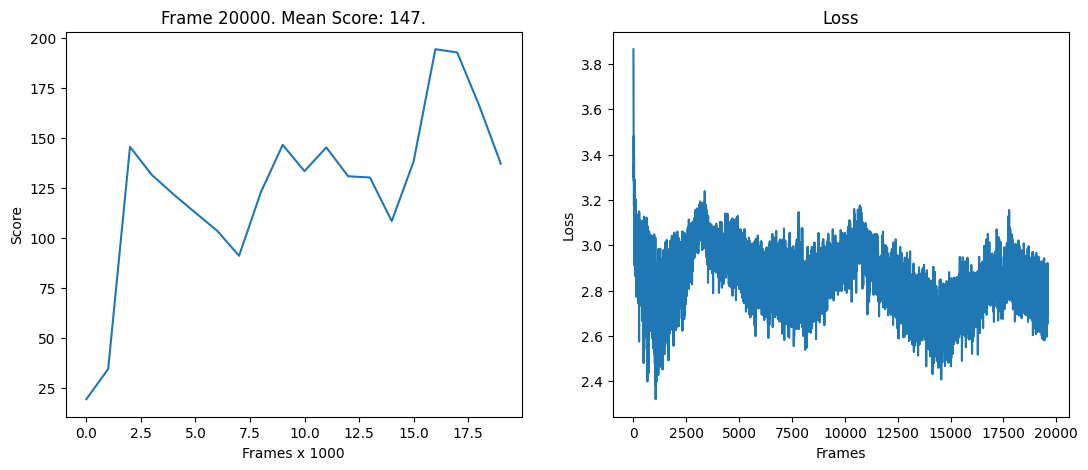

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  181.0
Score:  181.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  186.0
Score:  186.0
score:  196.0
Score:  196.0
score:  185.0
Score:  185.0
score:  200.0
Score:  200.0
score:  181.0
Score:  181.0
score:  181.0
Score:  181.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 191.0
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [44]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [45]:
combo =combinations[3]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': False, 'no_priority': True, 'no_n_step': False, 'no_categorical': False, 'no_noise': False}


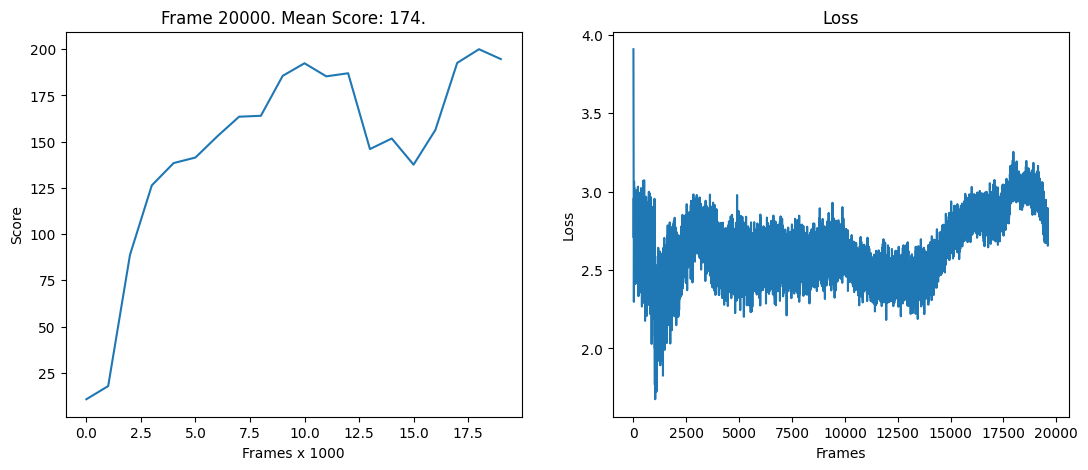

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 200.0
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [46]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [47]:
combo =combinations[4]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': False, 'no_priority': False, 'no_n_step': True, 'no_categorical': False, 'no_noise': False}


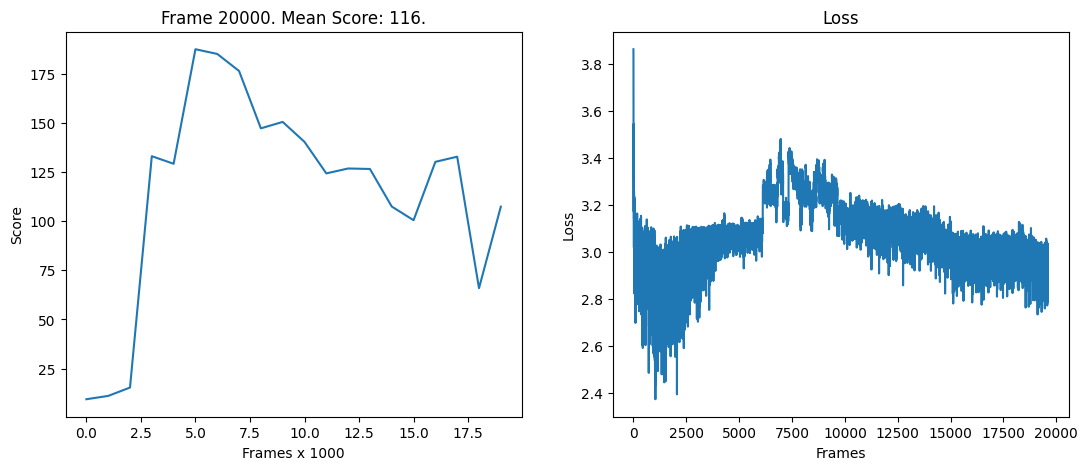

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  199.0
Score:  199.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 199.9
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [48]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [49]:
combo =combinations[5]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': False, 'no_priority': False, 'no_n_step': False, 'no_categorical': True, 'no_noise': False}


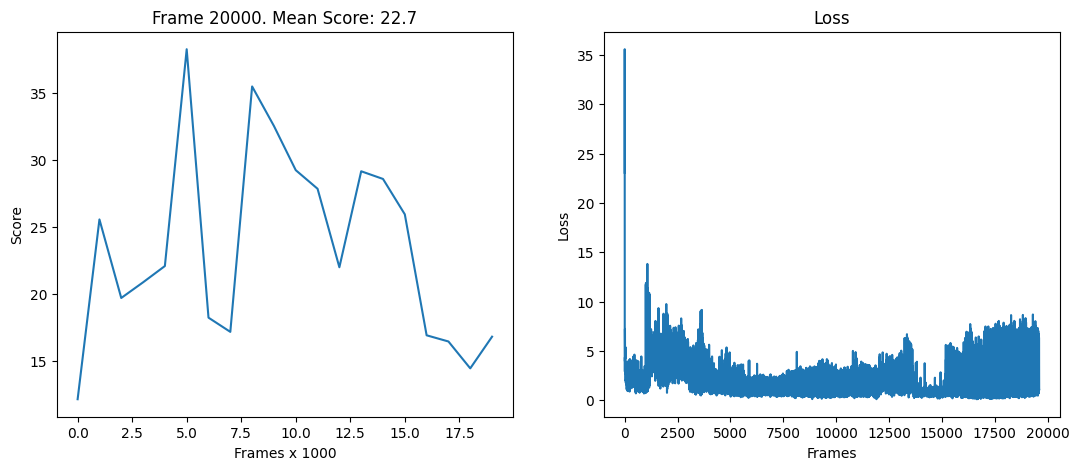

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  32.0
Score:  32.0
score:  28.0
Score:  28.0
score:  47.0
Score:  47.0
score:  39.0
Score:  39.0
score:  40.0
Score:  40.0
score:  24.0
Score:  24.0
score:  41.0
Score:  41.0
score:  108.0
Score:  108.0
score:  36.0
Score:  36.0
score:  42.0
Score:  42.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 43.7
Best score: 108.0
~~~~~~~~~~~~~~~~~~~~~~~


In [50]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [51]:
combo =combinations[6]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': False, 'no_dueling': False, 'no_priority': False, 'no_n_step': False, 'no_categorical': False, 'no_noise': True}


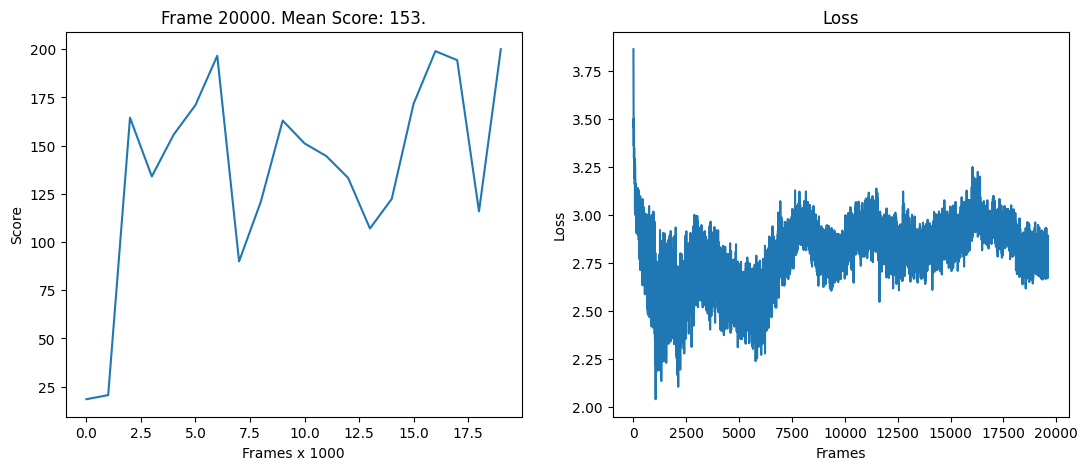

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
score:  200.0
Score:  200.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 200.0
Best score: 200.0
~~~~~~~~~~~~~~~~~~~~~~~


In [52]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()


In [53]:
combo =combinations[7]

print("=====================================================")
print(f"Testing combination: {combo}")
print("=====================================================")

Testing combination: {'no_double': True, 'no_dueling': True, 'no_priority': True, 'no_n_step': True, 'no_categorical': True, 'no_noise': True}


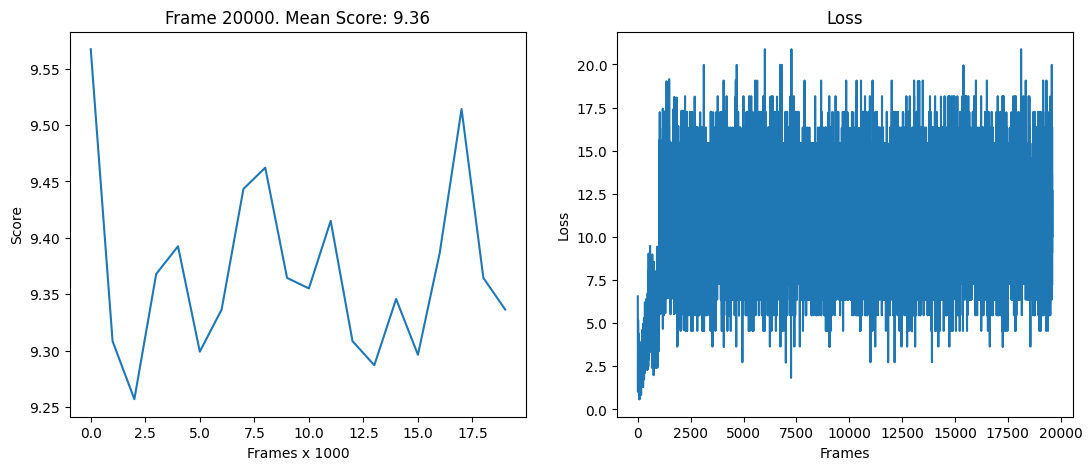

Saving model...
Model saved in: models/CartPole-v0_20000.tar
Saving model...
Model saved in: models/CartPole-v0_20000.tar
Restoring saved model...
Model restored from: models/CartPole-v0_20000.tar
score:  9.0
Score:  9.0
score:  9.0
Score:  9.0
score:  10.0
Score:  10.0
score:  10.0
Score:  10.0
score:  9.0
Score:  9.0
score:  9.0
Score:  9.0
score:  10.0
Score:  10.0
score:  8.0
Score:  8.0
score:  10.0
Score:  10.0
score:  8.0
Score:  8.0
~~~~~~~~~~~~~~~~~~~~~~~
Average score: 9.2
Best score: 10.0
~~~~~~~~~~~~~~~~~~~~~~~


: 

In [ ]:

agent = DQNAgent(env, memory_size, batch_size, target_update,
                plot=plot,
                frame_interval=frame_interval,
                frame_preprocess=preprocess_function,
                n_frames_stack=frames_stack,
                model_name=model_name,
                training_delay=training_delay,
                no_double=combo["no_double"],
                no_dueling=combo["no_dueling"],
                no_priority=combo["no_priority"],
                no_n_step=combo["no_n_step"],
                no_categorical=combo["no_categorical"],
                no_noise=combo["no_noise"],
            )

if train:
    score, loss = agent.train(num_frames)
    agent.save()

if test:
    best_score = -np.inf
    best_frames = []
    agent.load()
    tot_score = 0
    frames = []
    for i in range(trials):
        score, frames = agent.test(get_frames=True)
        tot_score += score
        print("Score: ", score)
        if score > best_score:
            best_score = score
            best_frames = frames
    print("~~~~~~~~~~~~~~~~~~~~~~~")
    print("Average score:", tot_score / trials)
    print("Best score:", best_score)
    print("~~~~~~~~~~~~~~~~~~~~~~~")

    env.close()
